## LeNet5
![LeNet5](https://cuijiahua.com/wp-content/uploads/2018/01/dl_3_1.png)
 卷积层：提取特征（由卷积核决定特征类型）<br>
 降采样层（池化层）：降维，减小计算量，降低过拟合<br>
 全连接层：输出

### 各层属性
![layers](https://cuijiahua.com/wp-content/uploads/2018/01/dl_3_4.jpg)


<details>
<summary>INPUT-输入层</summary>
  &emsp;&emsp;输入图像尺寸为32 * 32
</details>
    
    
<details>
<summary>C1卷积层</summary>
  &emsp;&emsp;输入图片：32 * 32<br>
  &emsp;&emsp;卷积核大小：5 * 5<br>
  &emsp;&emsp;卷积核种类：6<br>
  &emsp;&emsp;输出feature maps大小：28 * 28  （32 - 6 + 1）<br>
  &emsp;&emsp;神经元数量：28 * 28 * 6<br>
  &emsp;&emsp;可训练参数：（5 * 5 + 1） * 6  （25units + 1bias）<br>
  &emsp;&emsp;连接数：可训练参数 * 6 * 28 * 28
</details>

<details>
<summary>S2池化层（下采样层）</summary>
  &emsp;&emsp;输入：28 * 28<br>
  &emsp;&emsp;池化参数：f = 2, stride = 2<br>
  &emsp;&emsp;采样种类：6<br>
  &emsp;&emsp;可训练参数：2 * 2 + 1<br>
  &emsp;&emsp;输出feature maps大小：14 * 14
</details>


<details>
<summary>C3卷积层</summary>
  &emsp;&emsp;卷积核大小：5 * 5<br>
  &emsp;&emsp;卷积核种类：16<br>
  &emsp;&emsp;输出feature maps大小：10 * 10
</details>

<details>
<summary>S4池化层（下采样层）</summary>
  &emsp;&emsp;输入：10 * 10<br>
  &emsp;&emsp;池化参数：f = 2, stride = 2<br>
  &emsp;&emsp;采样种类：16<br>
  &emsp;&emsp;输出feature maps大小：5 * 5
</details>

<details>
<summary>C5卷积层</summary>
  &emsp;&emsp;卷积核大小：5 * 5<br>
  &emsp;&emsp;卷积核种类：120<br>
  &emsp;&emsp;输出feature maps大小：1 * 1
</details>

<details>
<summary>F6全连接层</summary>
  &emsp;&emsp;输入：120维向量（1 * 1 * 120）<br>
  &emsp;&emsp;结点数：84<br>
  &emsp;&emsp;可训练参数：84 * (120 + 1)
</details>

<details>
<summary>OUTPUT全连接层</summary>
  &emsp;&emsp;结点数：10
</details>

### 识别过程
![process](https://cuijiahua.com/wp-content/uploads/2018/01/dl_3_11.png)

---
### 基于Pytorch搭建的LeNet-5及训练与测试

In [1]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()
        # 输入单通道，输出通道数6，卷积核size = 5, padding = 2
        self.conv1 = nn.Conv2d(1, 6, 5, 1, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/全连接层, y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积 → 激活 → 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape, -1表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [2]:
# 可学习参数
params = list(net.parameters())
print('可学习参数: ', len(params))
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

可学习参数:  10
conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [3]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.optim as optim
EPOCH = 4
BATCH_SIZE = 64
LR = 0.001

In [4]:
# pre-treat
transform = transforms.ToTensor()

trainset = tv.datasets.MNIST(
    root='F:/[Base] Code/DataSets',
    train=True,
    download=False,
    transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    )

testset = tv.datasets.MNIST(
    root='F:/[Base] Code/DataSets',
    train=False,
    download=False,
    transform=transform)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
device = torch.device("cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)

cuda


### train & test

In [5]:
loss_list = []
acc_list = []

if __name__ == "__main__":

    for epoch in range(EPOCH):
        sum_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()
            
            loss_list.append(sum_loss / 100)
            
            if i % 100 == 99:
                print('[%d, %d] loss: %.03f'
                      % (epoch + 1, i + 1, sum_loss / 100))
                
                sum_loss = 0.0
        with torch.no_grad():
            correct = 0
            total = 0
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
                
                acc_list.append(100 * correct / total)
            
            print('第%d个epoch的识别准确率为：%d%%' % (epoch + 1, (100 * correct / total)))
    torch.save(net.state_dict(), 'MNIST_LeNet.pth')

[1, 100] loss: 2.303
[1, 200] loss: 2.299
[1, 300] loss: 2.296
[1, 400] loss: 2.291
[1, 500] loss: 2.284
[1, 600] loss: 2.276
[1, 700] loss: 2.258
[1, 800] loss: 2.220
[1, 900] loss: 2.090
第1个epoch的识别准确率为：58%
[2, 100] loss: 1.318
[2, 200] loss: 0.815
[2, 300] loss: 0.623
[2, 400] loss: 0.532
[2, 500] loss: 0.424
[2, 600] loss: 0.431
[2, 700] loss: 0.404
[2, 800] loss: 0.351
[2, 900] loss: 0.362
第2个epoch的识别准确率为：91%
[3, 100] loss: 0.295
[3, 200] loss: 0.288
[3, 300] loss: 0.312
[3, 400] loss: 0.257
[3, 500] loss: 0.294
[3, 600] loss: 0.256
[3, 700] loss: 0.234
[3, 800] loss: 0.219
[3, 900] loss: 0.238
第3个epoch的识别准确率为：94%
[4, 100] loss: 0.213
[4, 200] loss: 0.196
[4, 300] loss: 0.193
[4, 400] loss: 0.188
[4, 500] loss: 0.202
[4, 600] loss: 0.180
[4, 700] loss: 0.164
[4, 800] loss: 0.167
[4, 900] loss: 0.147
第4个epoch的识别准确率为：95%


* GPU: 注意增大batch_size，否则loss会产生强烈的振荡现象，这与GPU并行计算的性质有关

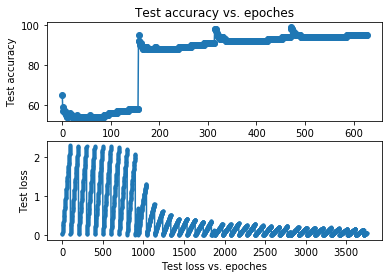

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
x1 = range(0, 628)
x2 = range(0, 3752)
y1 = acc_list
y2 = loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Test accuracy vs. epoches')
plt.ylabel('Test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Test loss vs. epoches')
plt.ylabel('Test loss')
plt.show()
plt.savefig("accuracy_loss.jpg")